# Declare and read data

In [4]:
import pandas as pd
import numpy as numpy
import warnings
warnings.filterwarnings('ignore')
red = pd.read_csv('reduced_dataset-release.csv', encoding='utf-8')

# EDA

## Basic EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
def overview(df, message):
    print(f'{message}')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of Features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique: ')
    print(df.nunique())
    dups=df.duplicated()
    print('\nDuplicate Rows: ', df[dups])
    plt.figure(figsize=(10, 12))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

A overview about reduced dataset

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143282 entries, 0 to 143281
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         124761 non-null  object 
 1   TWEET              143279 non-null  object 
 2   STOCK              85176 non-null   object 
 3   DATE               85176 non-null   object 
 4   LAST_PRICE         85176 non-null   float64
 5   1_DAY_RETURN       85176 non-null   float64
 6   2_DAY_RETURN       85176 non-null   float64
 7   3_DAY_RETURN       85176 non-null   float64
 8   7_DAY_RETURN       85176 non-null   float64
 9   PX_VOLUME          85176 non-null   float64
 10  VOLATILITY_10D     85171 non-null   float64
 11  VOLATILITY_30D     85165 non-null   float64
 12  LSTM_POLARITY      85175 non-null   object 
 13  TEXTBLOB_POLARITY  45594 non-null   object 
 14  MENTION            27073 non-null   object 
dtypes: float64

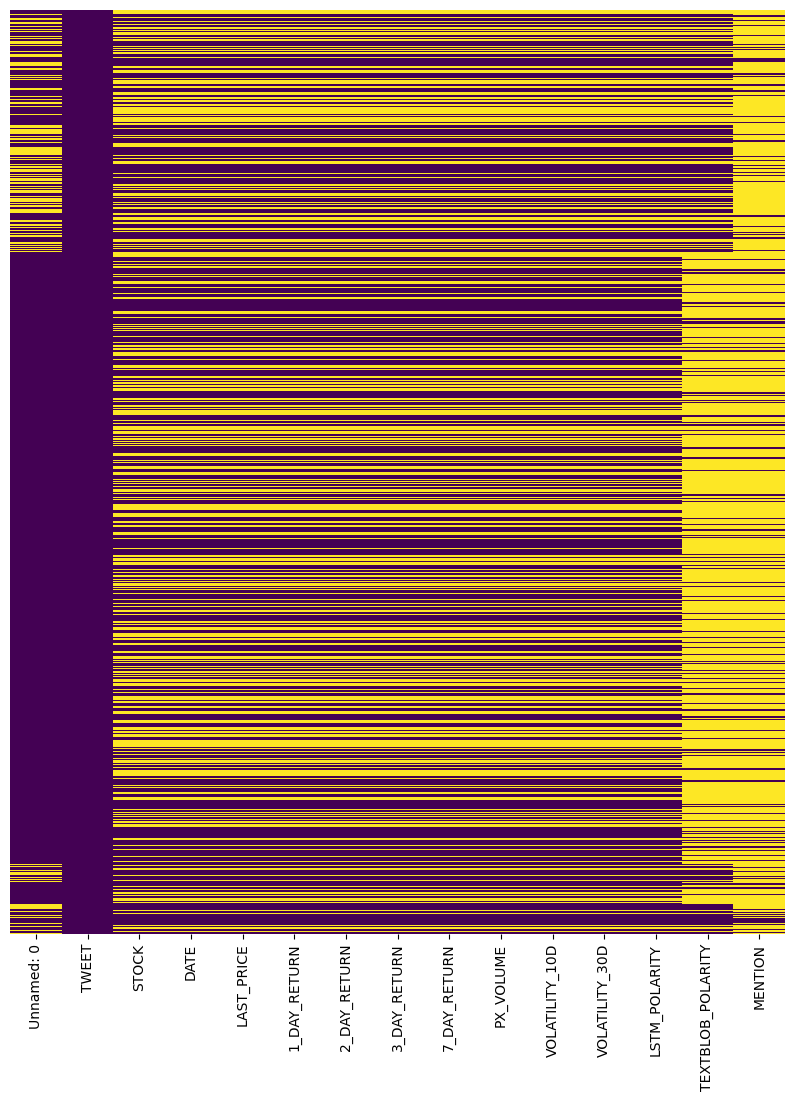

In [8]:
overview(red, 'A overview about reduced dataset')

## Cleaning data

In [10]:
red

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143277,861723,https://t.co/IsS8FGekqH: New Releases - Amazon...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143278,NaN,Amazon,30/09/2018,2003.0,0.000000,0.000000,0.004983,-0.043929,4.085135e+06,20.709,22.946,1.000,0.13636363636363635,@amazon,NaN
143279,861864,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.080000,0.000000,0.000000,0.000232,-2.896245e-02,1780759.000,15.005,17.588,1,0.0,@Google
143280,862071,Homegate with Lipton® Iced Tea from Walmart th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
red = red[red.isnull().sum(axis=1) <= 6]

In [12]:
import numpy as np
import pandas as pd
def shift_and_trim_row(row):
    if pd.isna(row[0]):
        shifted_row = np.insert(row, 0, np.nan)
    else:
        shifted_row = row
    return shifted_row[:len(row)]
df = red.copy()
df = df.apply(shift_and_trim_row, axis=1, result_type="expand")
df

Bảng sau khi thay đổi:


,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
1,NaN,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.0,@amazon
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
6,NaN,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.8,@amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143275,NaN,NaN,Amazon,30/09/2018,2003.0,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.3333333333333333,@amazon
143276,861648,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,30/09/2018,2003.0,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1,0.6,@amazon
143278,NaN,NaN,Amazon,30/09/2018,2003.0,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.13636363636363635,@amazon
143279,861864,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1,0.0,@Google


In [13]:
df=df.drop(columns=["Unnamed: 0"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85176 entries, 1 to 143281
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TWEET              66655 non-null  object 
 1   STOCK              85176 non-null  object 
 2   DATE               85176 non-null  object 
 3   LAST_PRICE         85176 non-null  object 
 4   1_DAY_RETURN       85176 non-null  float64
 5   2_DAY_RETURN       85176 non-null  float64
 6   3_DAY_RETURN       85176 non-null  float64
 7   7_DAY_RETURN       85176 non-null  float64
 8   PX_VOLUME          85176 non-null  float64
 9   VOLATILITY_10D     85176 non-null  float64
 10  VOLATILITY_30D     85160 non-null  float64
 11  LSTM_POLARITY      85176 non-null  object 
 12  TEXTBLOB_POLARITY  45593 non-null  object 
 13  MENTION            45594 non-null  object 
dtypes: float64(7), object(7)
memory usage: 9.7+ MB


In [15]:
df

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.0,@amazon
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
6,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.8,@amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143275,NaN,Amazon,30/09/2018,2003.0,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.3333333333333333,@amazon
143276,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,30/09/2018,2003.0,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1,0.6,@amazon
143278,NaN,Amazon,30/09/2018,2003.0,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.13636363636363635,@amazon
143279,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1,0.0,@Google


In [16]:
df1=df[df['MENTION'].isnull()]
df1

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
38065,01/10/2018,11.43,0.1469816272965879,0.146982,0.146982,0.140857,8791892.0,74.954,49.664,1.0,0.000000,@Ryanair,NaN,NaN
38067,01/10/2018,55.76,0.030308464849354462,0.030308,0.030308,0.014706,3609529.0,20.928,20.862,1.0,0.446429,@CBS,NaN,NaN
38069,01/10/2018,32.51,0.01568748077514627,0.015687,0.015687,0.037219,11990681.0,23.540,17.737,1.0,0.800000,@eBay,NaN,NaN
38073,01/10/2018,49.9284,0.007721056552983737,0.007721,0.007721,0.002427,8940163.0,7.945,13.033,-1.0,-0.500000,@Reuters,NaN,NaN
38077,01/10/2018,55.76,0.030308464849354462,0.030308,0.030308,0.014706,3609529.0,20.928,20.862,1.0,0.000000,@CBS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138675,30/08/2018,225.03,-0.009109896458250062,-0.023686,-0.031507,-0.042394,48793824.0,11.723,21.798,1.0,0.250000,@Apple,NaN,NaN
138679,31/08/2018,53.02,-0.0001886080724255963,0.016409,0.006978,0.001509,1708079.0,15.787,28.833,-1.0,0.500000,@CBS,NaN,NaN
138681,31/08/2018,122.88,-0.00024414062500000927,0.004801,-0.001058,-0.001139,2188844.0,11.300,22.593,-1.0,0.200000,@UPS,NaN,NaN
138683,31/08/2018,112.02,-0.0008926977325477086,0.003839,0.004999,-0.000803,4642826.0,4.824,13.207,1.0,0.150000,@Disney,NaN,NaN


In [17]:
import numpy as np
import pandas as pd
def shift_and_trim_row(row):
    if pd.isna(row[-1]):
        shifted_row = np.insert(row, 0, [np.nan, np.nan])
    else:
        shifted_row = row
    return shifted_row[:len(row)]
df = df.apply(shift_and_trim_row, axis=1, result_type="expand")
df

Bảng sau khi thay đổi:


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.0,@amazon
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
6,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.8,@amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143275,NaN,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.3333333333333333,@amazon
143276,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1,0.6,@amazon
143278,NaN,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.13636363636363635,@amazon
143279,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.08,0.0,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1,0.0,@Google


In [18]:
df['LSTM_POLARITY'] = pd.to_numeric(df['LSTM_POLARITY'], errors='coerce')
df['TEXTBLOB_POLARITY'] = pd.to_numeric(df['TEXTBLOB_POLARITY'], errors='coerce')
df['1_DAY_RETURN'] = pd.to_numeric(df['1_DAY_RETURN'], errors='coerce')
df['LAST_PRICE'] = pd.to_numeric(df['LAST_PRICE'], errors='coerce')
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.drop(columns=['MENTION'])

In [19]:
def count_match(row):
    if pd.isna(row['TWEET']) or pd.isna(row['STOCK']):
        return 0
    value_1 = row['TWEET'].lower()
    value_2 = row['STOCK'].lower()
    return value_1.count(value_2)
df['MENTION'] = df.apply(count_match, axis=1)
df

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
1,NaN,Amazon,2017-01-31,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.000000,0
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.000000,1
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,0.000000,1
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.000000,1
6,NaN,Amazon,2017-01-31,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143275,NaN,Amazon,2018-09-30,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.333333,0
143276,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,2018-09-30,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.600000,2
143278,NaN,Amazon,2018-09-30,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.136364,0
143279,RT @Google: With hands-free ordering from your...,Google,2018-09-30,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1.0,0.000000,3


In [20]:
import warnings
warnings.filterwarnings('ignore')
def handle_missing_data(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        df[col].fillna(df[col].mean(), inplace=True)  
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)    
    return df

In [21]:
handle_missing_data(df)

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
1,"RT @Apple: The all-new iPhone XS, iPhone XS Ma...",Amazon,2017-01-31,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.000000,0
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.000000,1
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,0.000000,1
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,0.000000,1
6,"RT @Apple: The all-new iPhone XS, iPhone XS Ma...",Amazon,2017-01-31,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143275,"RT @Apple: The all-new iPhone XS, iPhone XS Ma...",Amazon,2018-09-30,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.333333,0
143276,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,2018-09-30,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.600000,2
143278,"RT @Apple: The all-new iPhone XS, iPhone XS Ma...",Amazon,2018-09-30,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,0.136364,0
143279,RT @Google: With hands-free ordering from your...,Google,2018-09-30,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1.0,0.000000,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85176 entries, 1 to 143281
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TWEET              85176 non-null  object        
 1   STOCK              85176 non-null  object        
 2   DATE               85176 non-null  datetime64[ns]
 3   LAST_PRICE         85176 non-null  float64       
 4   1_DAY_RETURN       85176 non-null  float64       
 5   2_DAY_RETURN       85176 non-null  float64       
 6   3_DAY_RETURN       85176 non-null  float64       
 7   7_DAY_RETURN       85176 non-null  float64       
 8   PX_VOLUME          85176 non-null  float64       
 9   VOLATILITY_10D     85176 non-null  float64       
 10  VOLATILITY_30D     85176 non-null  float64       
 11  LSTM_POLARITY      85176 non-null  float64       
 12  TEXTBLOB_POLARITY  85176 non-null  float64       
 13  MENTION            85176 non-null  int64         
dtypes: datetim

## Save data

In [24]:
df.to_csv('reduded_dataset_cleaned.csv', index=False)

## Plot charts to understand the data

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
def eda_dataset(df):
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      +df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

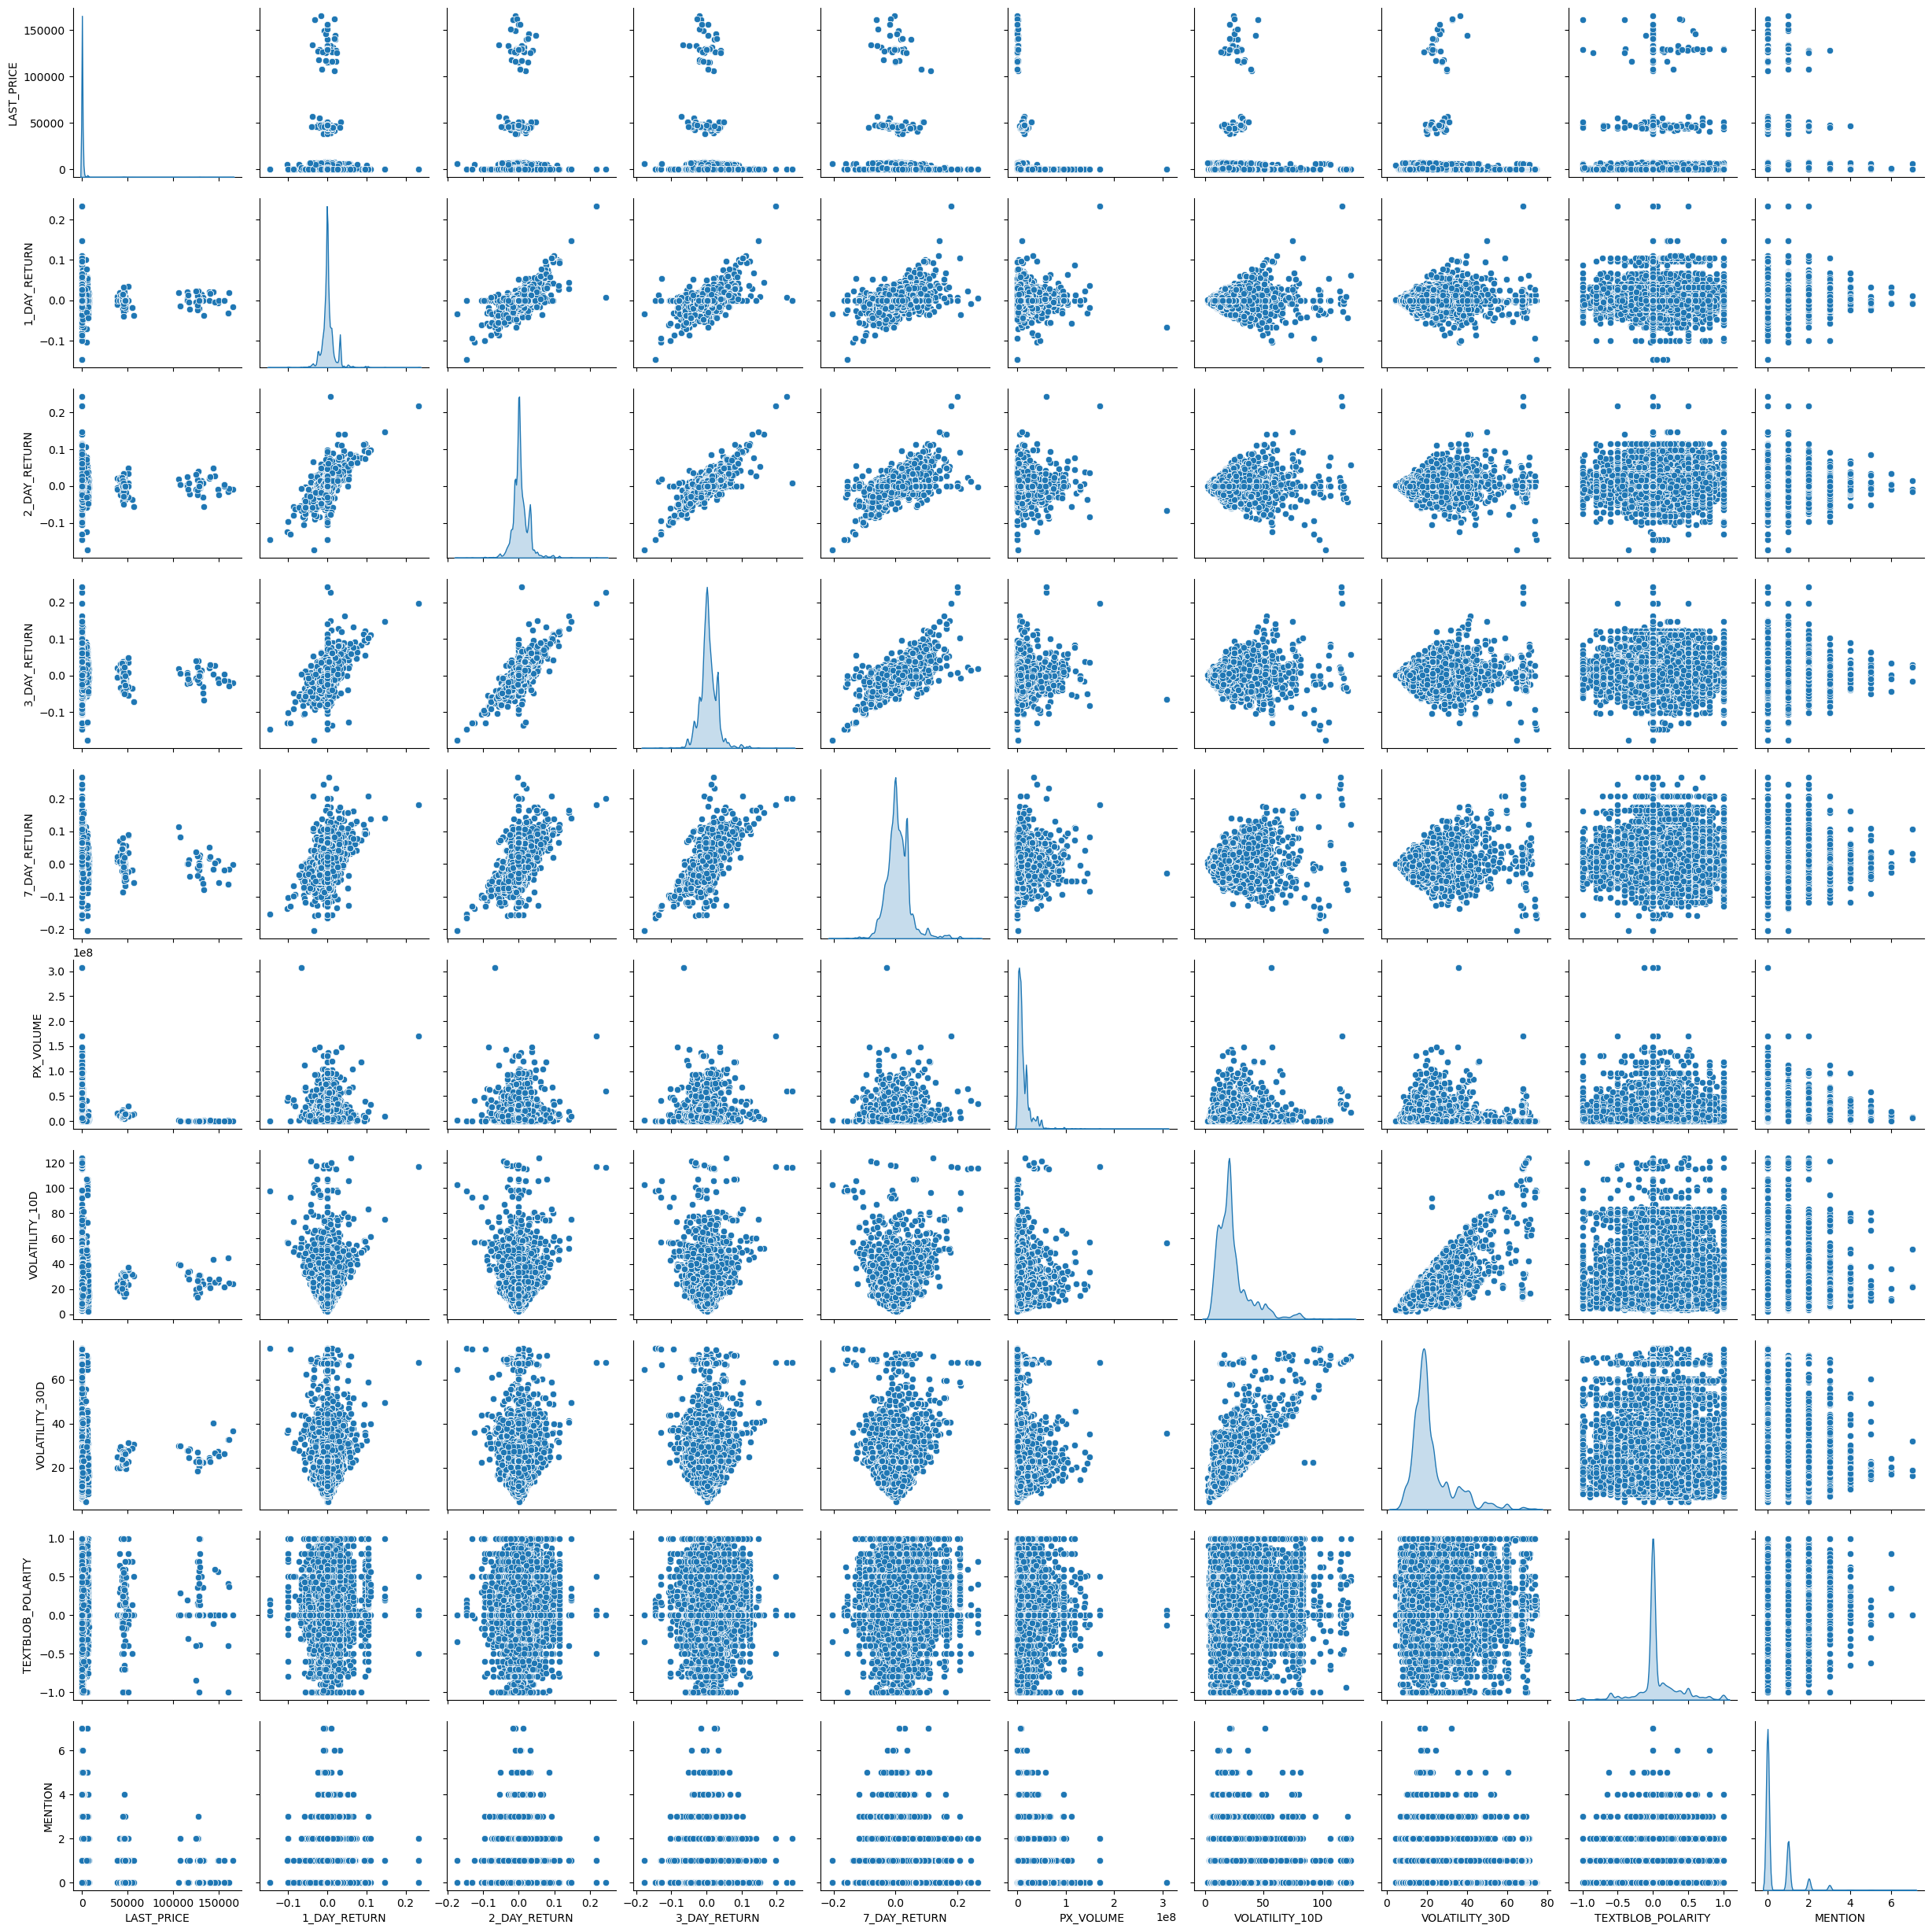

In [27]:
eda_dataset(df)

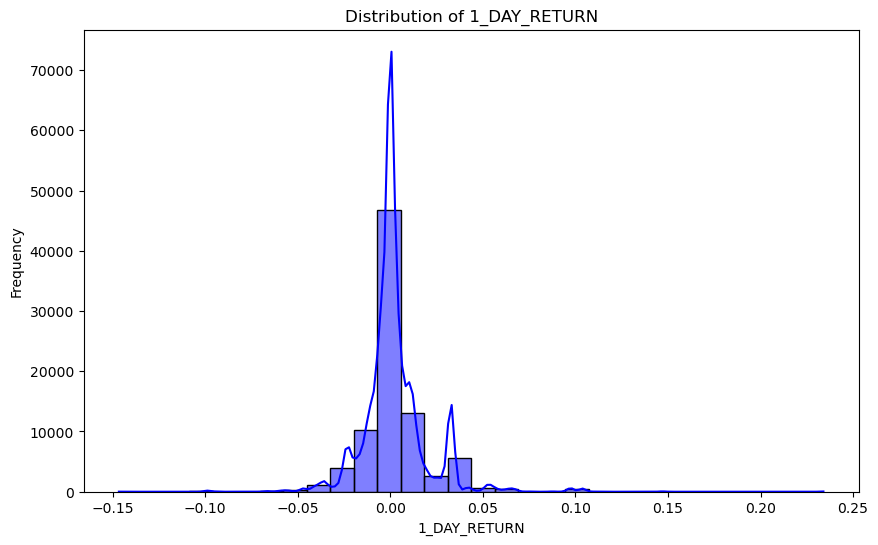

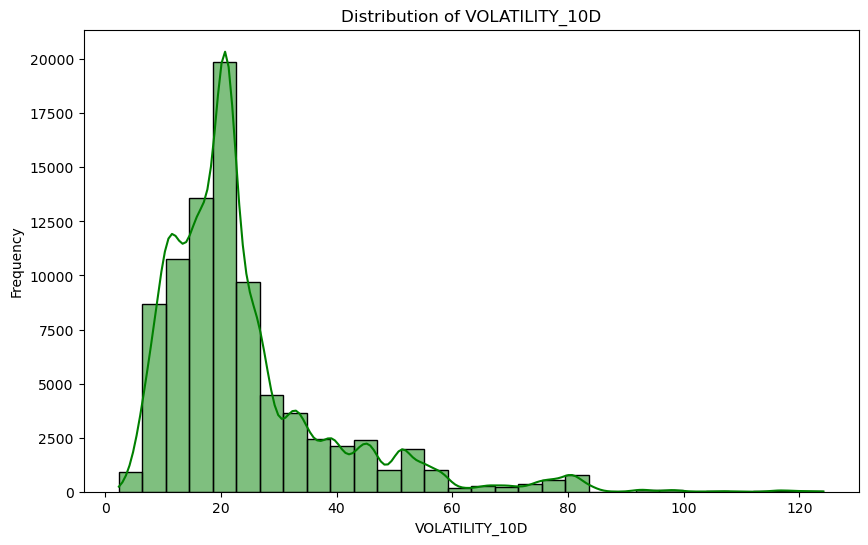

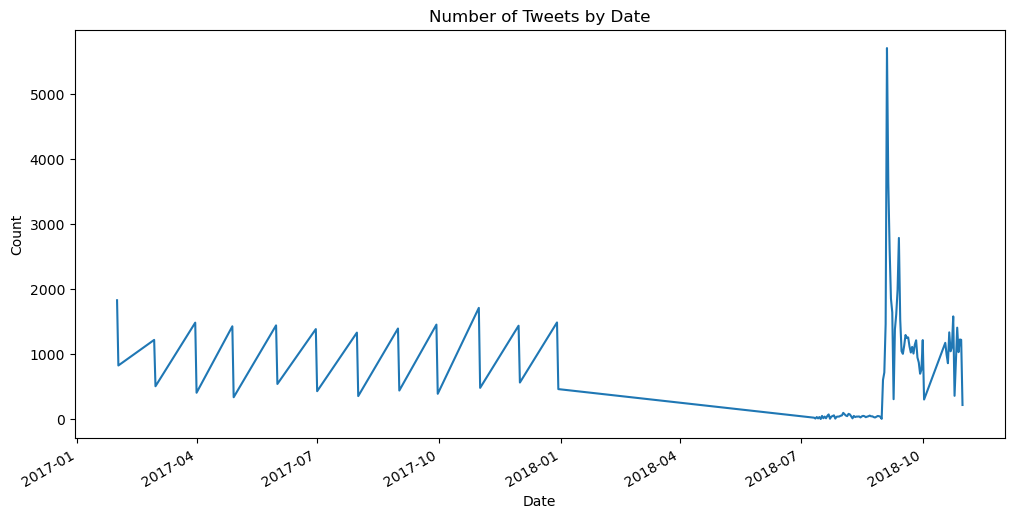

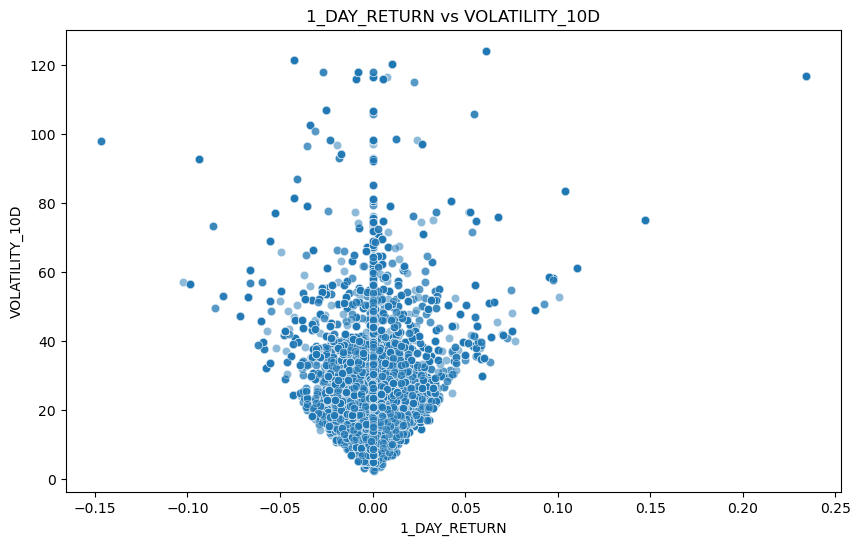

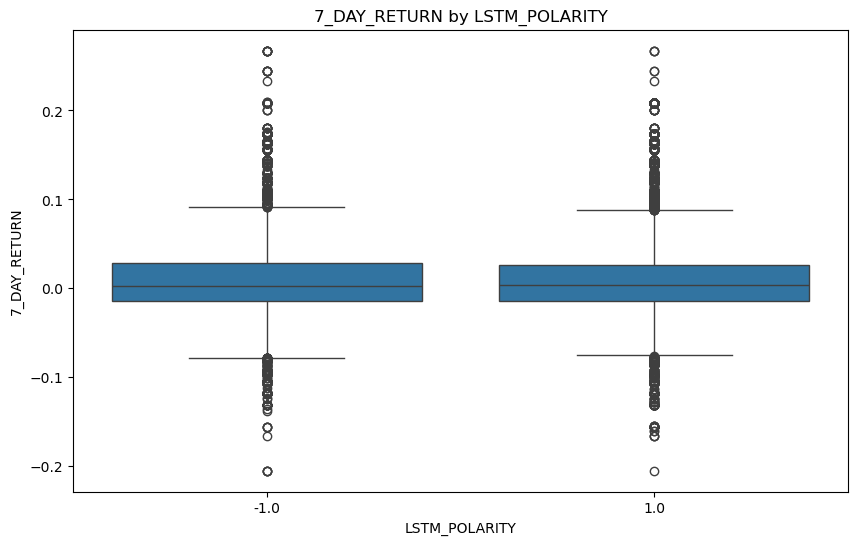

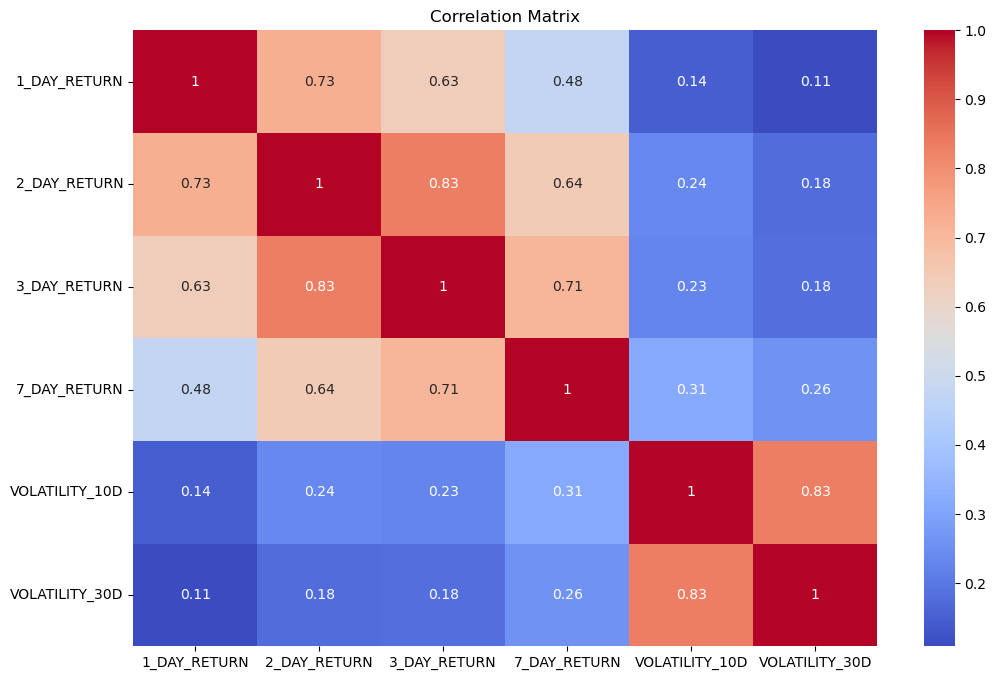

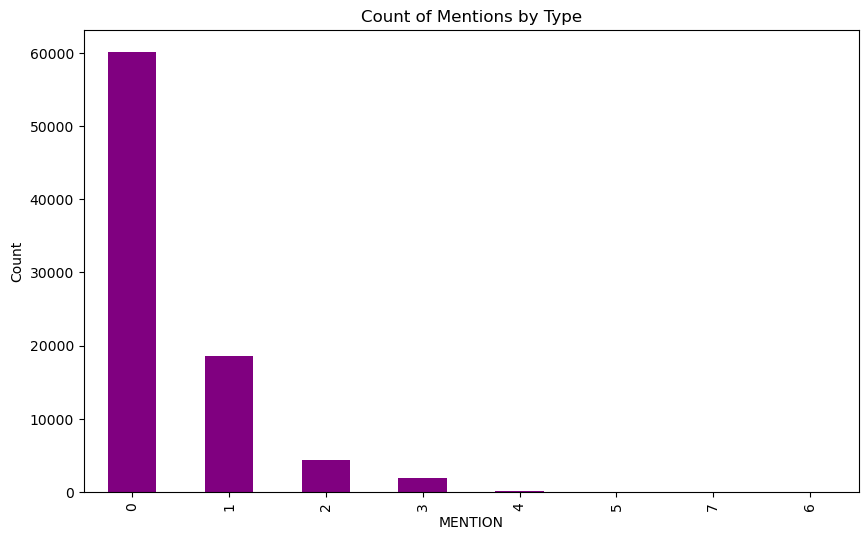

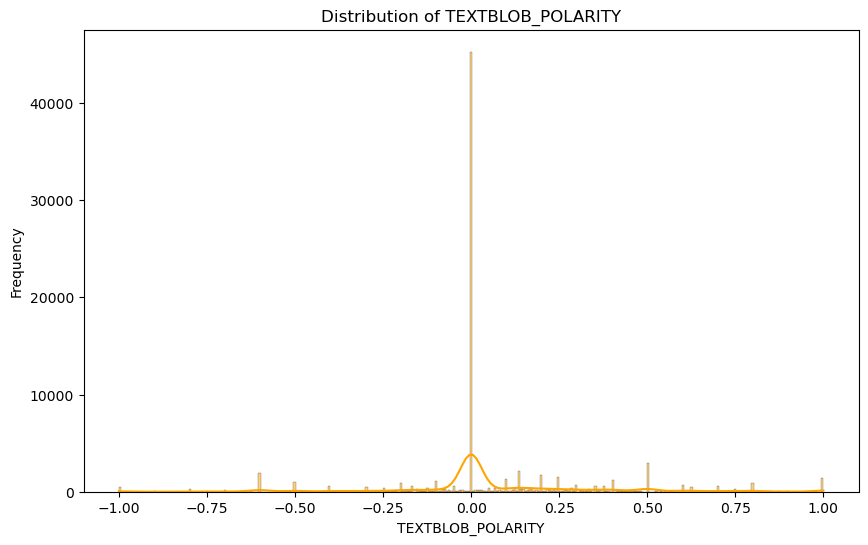

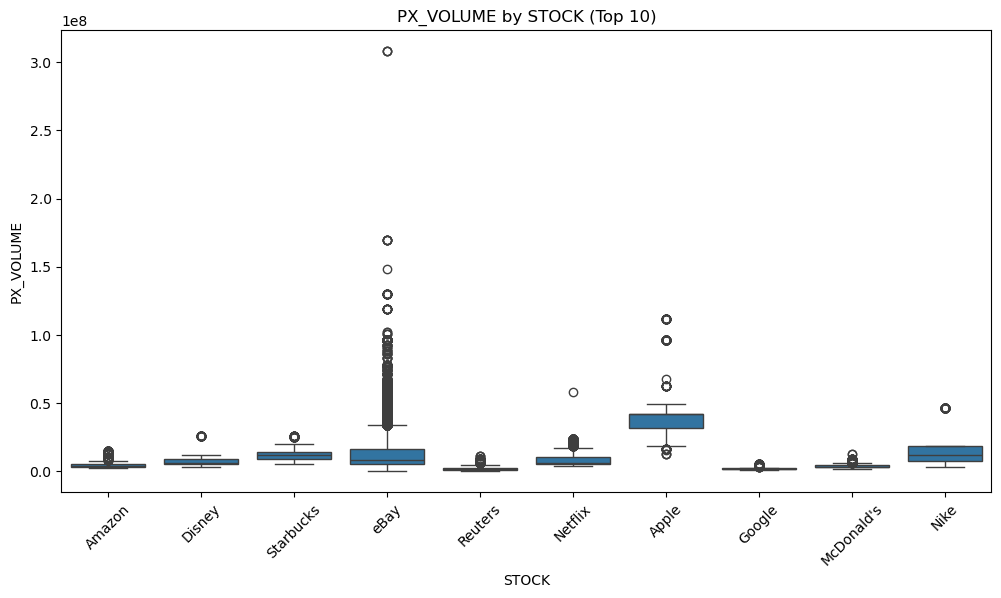

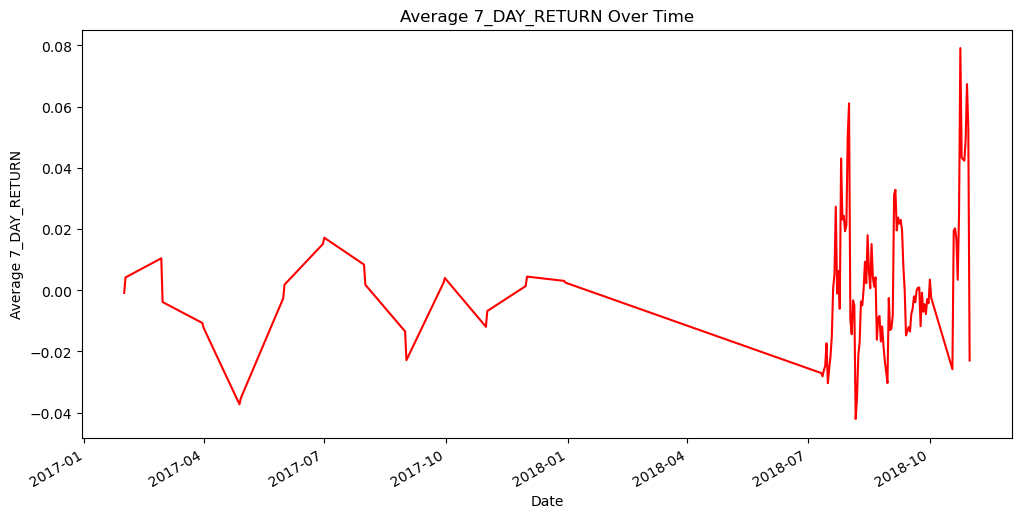

In [28]:
# 1. Distribution of 1_DAY_RETURN
plt.figure(figsize=(10, 6))
sns.histplot(df['1_DAY_RETURN'], kde=True, bins=30, color='blue')
plt.title('Distribution of 1_DAY_RETURN')
plt.xlabel('1_DAY_RETURN')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of VOLATILITY_10D
plt.figure(figsize=(10, 6))
sns.histplot(df['VOLATILITY_10D'], kde=True, bins=30, color='green')
plt.title('Distribution of VOLATILITY_10D')
plt.xlabel('VOLATILITY_10D')
plt.ylabel('Frequency')
plt.show()

# 3. Trend of LAST_PRICE over time
plt.figure(figsize=(12, 6))
df.groupby('DATE')['LAST_PRICE'].count().plot()
plt.title('Number of Tweets by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# 4. Scatterplot of 1_DAY_RETURN vs VOLATILITY_10D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='1_DAY_RETURN', y='VOLATILITY_10D', data=df, alpha=0.5)
plt.title('1_DAY_RETURN vs VOLATILITY_10D')
plt.xlabel('1_DAY_RETURN')
plt.ylabel('VOLATILITY_10D')
plt.show()

# 5. Boxplot of 7_DAY_RETURN by LSTM_POLARITY
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM_POLARITY', y='7_DAY_RETURN', data=df)
plt.title('7_DAY_RETURN by LSTM_POLARITY')
plt.xlabel('LSTM_POLARITY')
plt.ylabel('7_DAY_RETURN')
plt.show()

# 6. Heatmap of correlations between numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = df[['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN', 'VOLATILITY_10D', 'VOLATILITY_30D']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 7. Bar chart of MENTION counts by type
plt.figure(figsize=(10, 6))
df['MENTION'].value_counts().plot(kind='bar', color='purple')
plt.title('Count of Mentions by Type')
plt.xlabel('MENTION')
plt.ylabel('Count')
plt.show()

# 8. Distribution of TEXTBLOB_POLARITY
plt.figure(figsize=(10, 6))
df['TEXTBLOB_POLARITY'] = pd.to_numeric(df['TEXTBLOB_POLARITY'], errors='coerce')
sns.histplot(df['TEXTBLOB_POLARITY'], kde=True, color='orange')
plt.title('Distribution of TEXTBLOB_POLARITY')
plt.xlabel('TEXTBLOB_POLARITY')
plt.ylabel('Frequency')
plt.show()

# 9. Boxplot of PX_VOLUME by STOCK (Top 10)
plt.figure(figsize=(12, 6))
stocks_to_plot = df['STOCK'].value_counts().head(10).index
data_filtered = df[df['STOCK'].isin(stocks_to_plot)]
sns.boxplot(x='STOCK', y='PX_VOLUME', data=data_filtered)
plt.title('PX_VOLUME by STOCK (Top 10)')
plt.xlabel('STOCK')
plt.ylabel('PX_VOLUME')
plt.xticks(rotation=45)
plt.show()

# 10. Trend of average 7_DAY_RETURN over time
plt.figure(figsize=(12, 6))
df.groupby('DATE')['7_DAY_RETURN'].mean().plot(color='red')
plt.title('Average 7_DAY_RETURN Over Time')
plt.xlabel('Date')
plt.ylabel('Average 7_DAY_RETURN')
plt.show()